# **Estudio sobre la educacion y su relacion con el exito laboral**

***Autor***: Salvador Chacon

## **Definicion del problema**

El siguiente DataSet trata acerca de la relación entre el rendimiento académico y el éxito profesional en los Estados Unidos. Incluye registros de los antecedentes educativos, las habilidades y los resultados profesionales de los estudiantes con el objetivo de encontrar una relacion entre el exito laboral y la educacion.

Preguntas como:

* ¿Los estudiantes con más pasantías o certificaciones consiguen mejores salarios o más oportunidades?
* ¿Los estudiantes con altos puntajes en SAT y GPA tienen más éxito en términos de empleo y satisfacción?
* ¿Cómo influye el ranking de la universidad en el salario inicial y la cantidad de ofertas de trabajo?
* ¿Las habilidades blandas y el networking tienen un impacto significativo en las oportunidades de empleo?

Serviran de guia para el analisis de este DataSet, con la intencion de responder a hipotesis como:

* Los estudiantes de universidades mejor rankeadas reciben mayores salarios iniciales
* Los estudiantes con más pasantías y certificaciones tienen más ofertas de trabajo.
* Los graduados de carreras técnicas (por ejemplo, Ciencias de la Computación) tienen un salario inicial más alto en comparación con los graduados de carreras humanas.
* El salario inicial entre hombres y mujeres graduados es aproximadamente igual


## **Carga y preparacion de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/salvador551998/Salvador-Chacon-/main/Educacion.xlsx"

In [3]:
Educacion_df = pd.read_excel(url , engine='openpyxl')

### **Exploracion inicial**

In [4]:
Educacion_df.describe()

,tudent_ID,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2500.500000,23.442200,273.333200,1253.832000,504.335600,275.073000,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,5.056354e+05,5.578000,3.015800,5.482400
std,1443.520003,3.473712,97.419568,203.228954,291.060011,97.423859,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,1.449496e+05,2.871997,1.417446,2.883427
min,1.000000,18.000000,20.000000,900.000000,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.500000e+05,1.000000,1.000000,1.000000
25%,1250.750000,20.000000,234.750000,1076.000000,256.000000,235.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,4.020000e+05,3.000000,2.000000,3.000000
50%,2500.500000,23.000000,288.000000,1257.000000,501.500000,292.000000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,5.030000e+05,6.000000,3.000000,6.000000
75%,3750.250000,26.000000,344.000000,1432.000000,759.000000,346.000000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,6.050000e+05,8.000000,4.000000,8.000000
max,5000.000000,29.000000,399.000000,1600.000000,1000.000000,399.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,1.010000e+06,10.000000,5.000000,10.000000


In [5]:
Educacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tudent_ID              5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   object
 3   High_School_GPA        5000 non-null   int64 
 4   SAT_Score              5000 non-null   int64 
 5   University_Ranking     5000 non-null   int64 
 6   University_GPA         5000 non-null   int64 
 7   Field_of_Study         5000 non-null   object
 8   Internships_Completed  5000 non-null   int64 
 9   Projects_Completed     5000 non-null   int64 
 10  Certifications         5000 non-null   int64 
 11  Soft_Skills_Score      5000 non-null   int64 
 12  Networking_Score       5000 non-null   int64 
 13  Job_Offers             5000 non-null   int64 
 14  Starting_Salary        5000 non-null   int64 
 15  Career_Satisfaction  

In [6]:
#Se remueve la columna de ID ya que no impacta en el analisis y entorpece los calculos.
Educacion_df.drop(columns=["tudent_ID"], inplace= True)

### **Analisis de outliers en el DataSet**

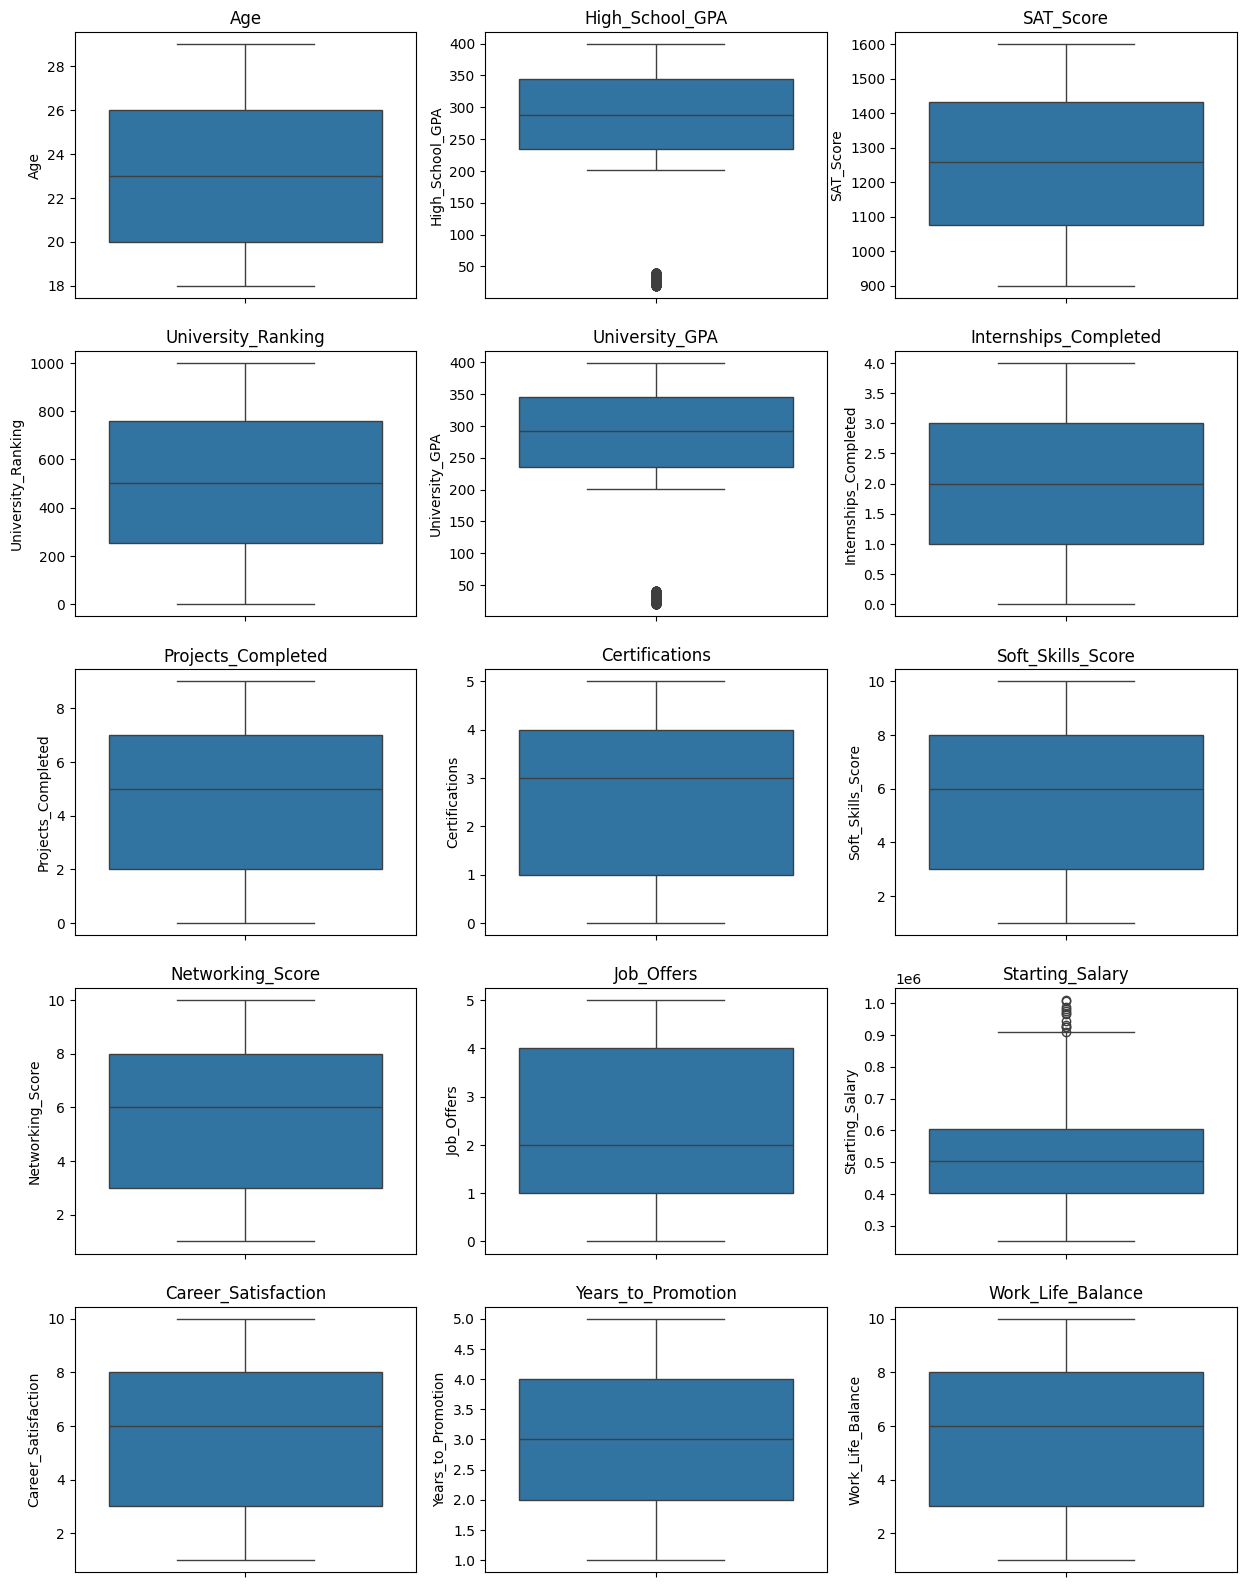

In [7]:
#Se realiza un grafico de caja para cada columna numerica del Dataframe para analizar outliers

Educacion_numerica_df = Educacion_df.select_dtypes(include=['float', 'int'])

n_cols = 3
n_rows = (len(Educacion_numerica_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for i, column in enumerate(Educacion_numerica_df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data = Educacion_numerica_df[column], ax = axes[row, col])
    axes[row, col].set_title(column)

In [10]:
#Calculo el % que representan los outliers en cada una de las columnas en donde se detectaron

contador1 = (Educacion_df['High_School_GPA'] < 100).sum()
contador2 = (Educacion_df['University_GPA'] < 100).sum()
contador3 = (Educacion_df['Starting_Salary'] > 900000).sum()
print("El % que representan los outliers en High_School_GPA es: ", round((contador1/5000)*100,2),"%","\nEl % que representan los outliers en University_GPA es: ", (contador2/5000)*100,"%",  "\nEl % que representan los outliers en Starting_Salary es: ", (contador3/5000)*100,"%")

El % que representan los outliers en High_School_GPA es:  9.88 % 
El % que representan los outliers en University_GPA es:  9.78 % 
El % que representan los outliers en Starting_Salary es:  0.38 %


Se puede ver en los graficos que tanto el "Starting_Salary", el "High_School_GPA" y "University_GPA" poseen outliers, el primero en el umbral superior y los otros 2 en el umbral inferior. Esto puede distorcionar el analisis y la correlacion entre las variables por lo que para lograr una mejor interpretacion de los datos, se toma la desicion de eliminarlos, siendo ademas que los mismos representan menos del 10% de los datos en cada caso (Que si bien es informacion que no se esta considerando, se opta por este camino).

In [11]:
#Se remueven los outliers para una mejor interpretacion de los datos. Se opta por usar 2 veces la desviacion estandar ya que con 3 todavia seguian figurando outliers.
Educacion_df = Educacion_df[Educacion_df['Starting_Salary'] < Educacion_df['Starting_Salary'].mean() + 2 * Educacion_df['Starting_Salary'].std()]
Educacion_df = Educacion_df[Educacion_df['High_School_GPA'] > Educacion_df['High_School_GPA'].mean() - 2 * Educacion_df['High_School_GPA'].std()]
Educacion_df = Educacion_df[Educacion_df['University_GPA'] > Educacion_df['University_GPA'].mean() - 2 * Educacion_df['University_GPA'].std()]

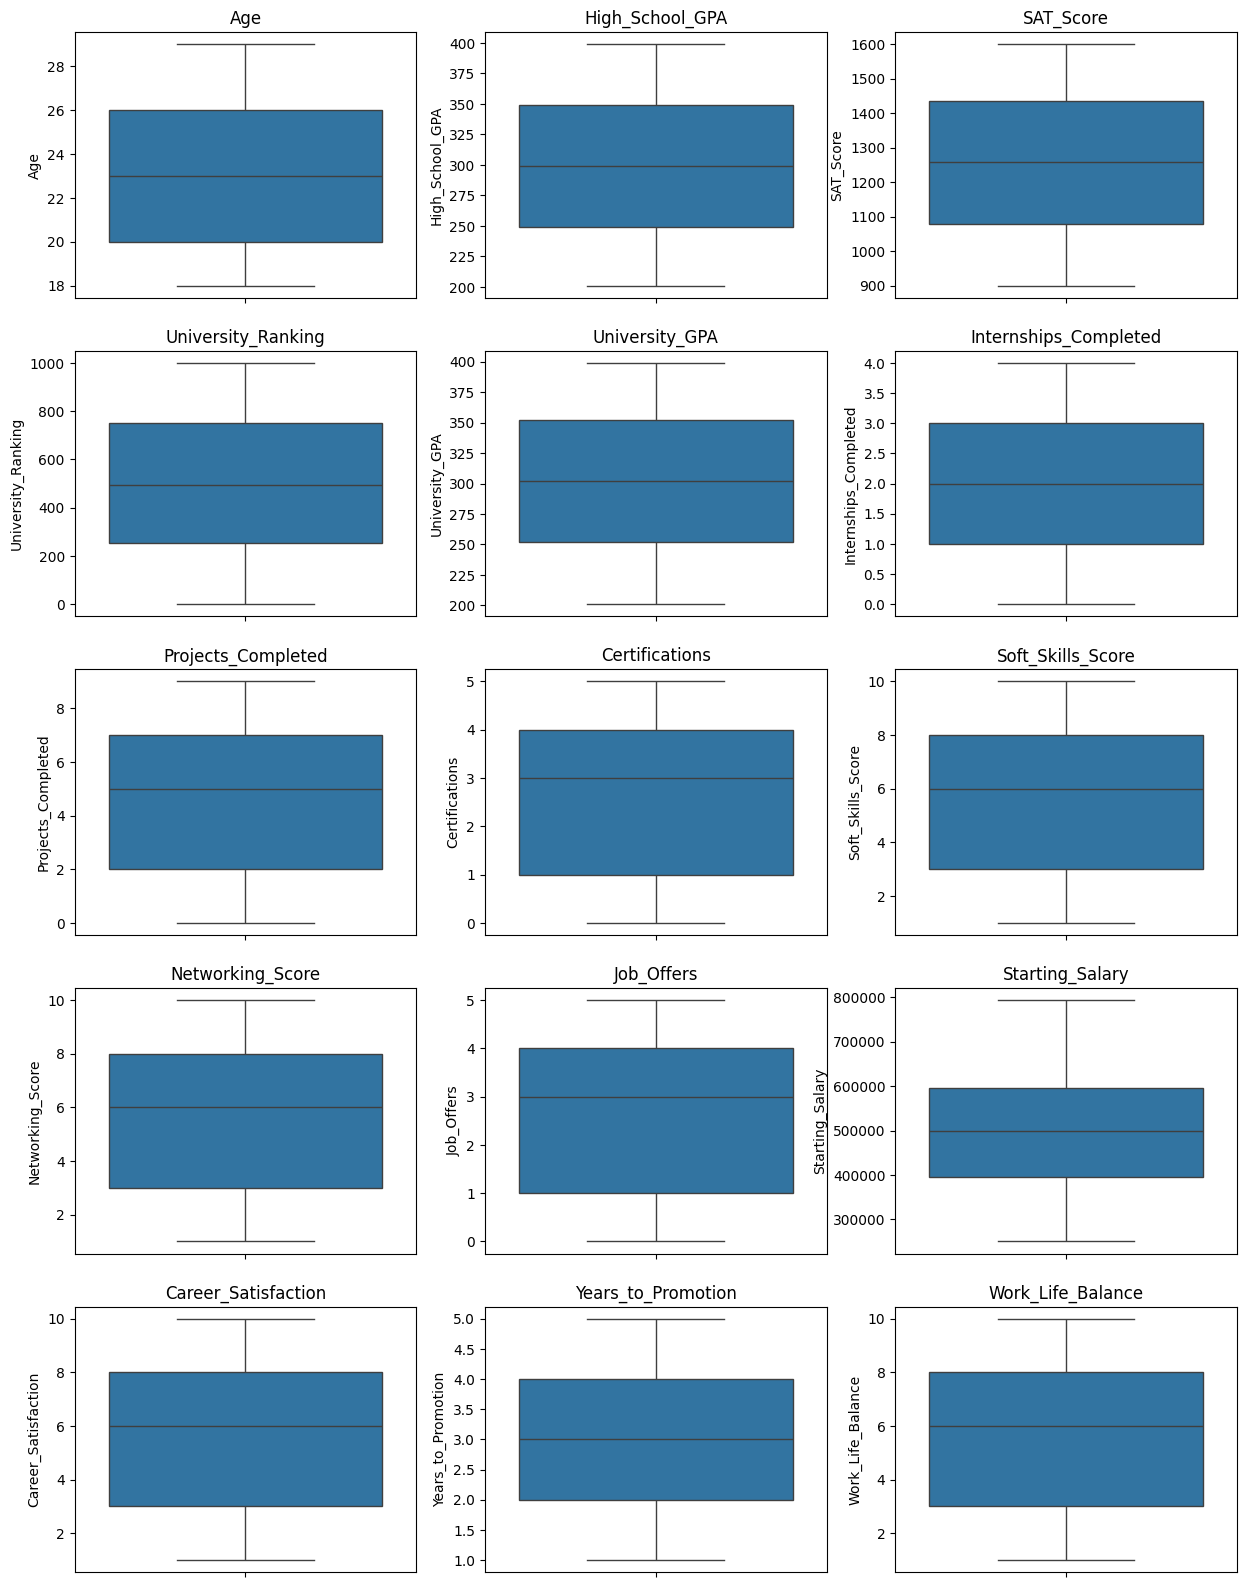

In [12]:
#Se vuelve a visualizar los graficos con los outliers removidos

Educacion_numerica_df = Educacion_df.select_dtypes(include=['float', 'int'])

n_cols = 3
n_rows = (len(Educacion_numerica_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for i, column in enumerate(Educacion_numerica_df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data = Educacion_numerica_df[column], ax = axes[row, col])
    axes[row, col].set_title(column)

## **EDA (Analisis exploratorio de datos)**

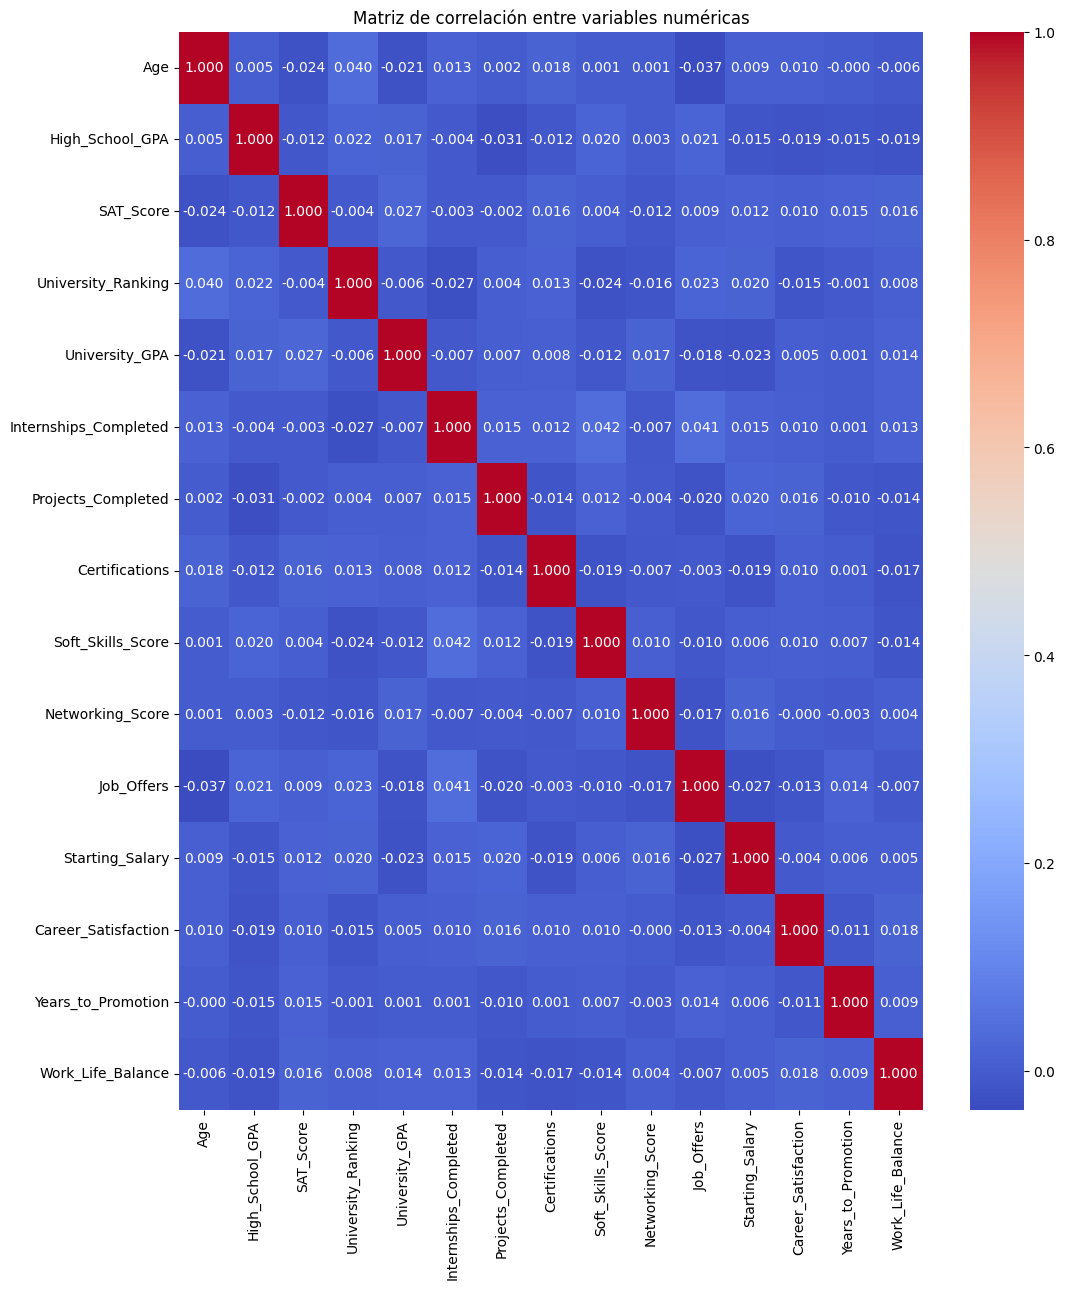

In [13]:
#Se visualiza una matriz de correlacion para ver la correlacion que existe entre las variables

fig = plt.figure(figsize = (12, 14))
Educacion_numerica_df= Educacion_df.select_dtypes(include=['float', 'int'])
sns.heatmap(Educacion_numerica_df.corr(), annot = True, fmt=".3f", cmap="coolwarm",)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

De la anterior matriz de correlacion se pueden sacar las siguientes conclusiones rapidamente:



*   El salario inicial esta mayormente relacionado con los proyectos completados, el ranking de la universidad y las pasantias completadas. E inversamente relacionado con el GPA de la universidad y del secundario
*   Hay una mayor relacion entre el GPA de la secundaria con la oferta de trabajos que el GPA de la universidad y la oferta de trabajos, que es mas inversamente proporcional. Sin embargo la mayor relacion con las ofertas de trabajo es la cantidad de pasantias realizadas, lo cual habla de que se valora mas la experiencia.
*  El ranking de la universidad se relaciona con el salario inicial, la cantidad de ofertas de trabajo y con el GPA de la secundaria.

Todo esto nos da un indicio de que hay una mayor afinidad entre la experiencia que la persona tenga y la universidad a la que va con su salario y sus ofertas de trabajo, mas que su GPA de universidad o secundario






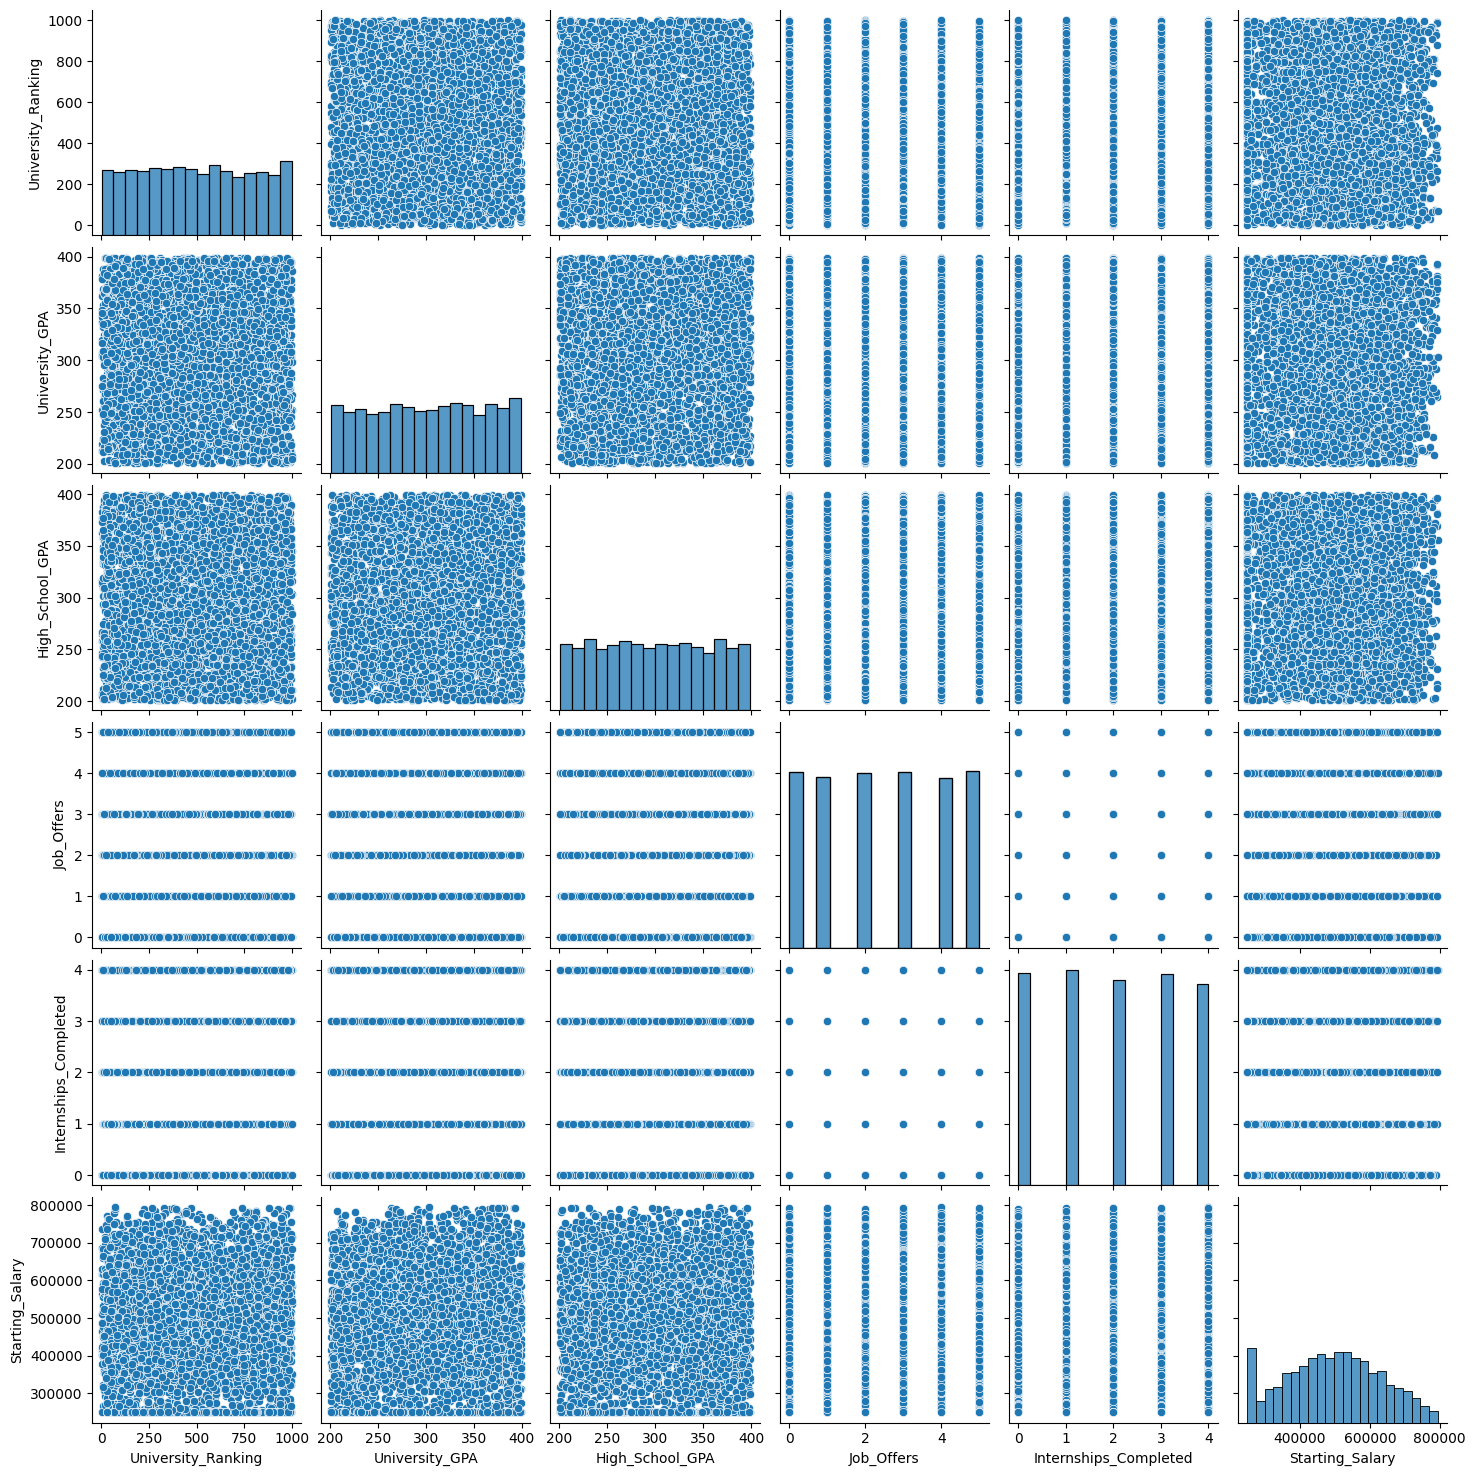

In [14]:
#Se genera scatter plots para las variables mas influyentes determinadas de la anterior matriz de correlacion con el objetivo de /n
# visualizar relaciones entre variables, detectar correlaciones y analizar distribuciones individuales de manera general.

sns.pairplot(Educacion_df[['University_Ranking', 'University_GPA', 'High_School_GPA','Job_Offers','Internships_Completed', 'Starting_Salary']])
plt.show()

De los anteriores graficos podemos observar que:


* Cuantas más pasantías tenga un estudiante, mayor será su salario inicial. Esto confirma que la experiencia laboral durante los estudios tiene un efecto positivo en las perspectivas de carrera.
* Hay una distribución uniforme en el ranking universitario, lo que sugiere que un alto ranking universitario no siempre garantiza un alto promedio académico (GPA) entre los estudiantes.
* La mayoría de los graduados reciben un salario inicial en el rango de 40,000 a 75,000

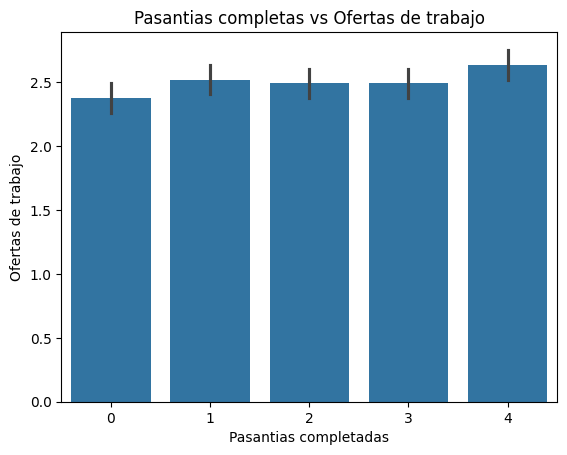

In [15]:
#Se visualiza especificamente la relacion entre las pasantias realizadas y las ofertas de trabajo

sns.barplot(x="Internships_Completed",y="Job_Offers",data=Educacion_df)
plt.xlabel("Pasantias completadas")
plt.ylabel('Ofertas de trabajo')
plt.title('Pasantias completas vs Ofertas de trabajo')
plt.show()

Se puede ver que existe una tendencia creciente entre la cantidad de pasantias completadas y las ofertas de trabajo, lo cual es otro indicador de la ventaja del trabajo durante los estudios frente a una persona que no posee experiencia.

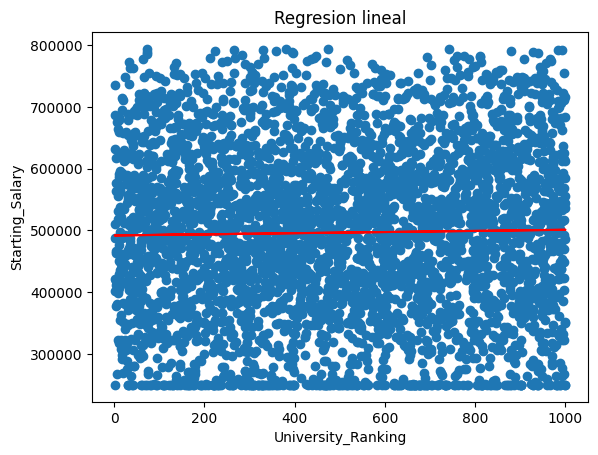

In [16]:
#Se analiza en profundidad la relacion existente entre el ranking de la universidad y el salario inicial. Utilizando un modelo de regresion lineal

model = LinearRegression()
X = Educacion_df['University_Ranking'].values.reshape(-1, 1)
y = Educacion_df['Starting_Salary']
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('University_Ranking')
plt.ylabel('Starting_Salary')
plt.title('Regresion lineal')
plt.show()

Podemos observar que los estudiantes de universidades más prestigiosas (con un valor de University_Ranking más bajo) tienden a obtener salarios iniciales más altos, pero la relación no es lineal, ya que existe una gran variabilidad.

In [19]:
#Se utiliza el RMSE para evaluar el modelo utilizado

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("RMSE del modelo:", round(rmse,2))
print("El % que representa el RSME de nuestro modelo es del: ", round((rmse/800000)*100,2),"%")

RMSE del modelo: 135350.2
El % que representa el RSME de nuestro modelo es del:  16.92 %


Dado que nuestro rango de valores para la variable "y" van entre 0 y 800000 aproximadamente, un RMSE de 135350 representa un error promedio de aproximadamente 135397 unidades. Comparado con el rango de valores es alrededor del 17%. Si bien no es un valor extremadamente bajo, pero tampoco es un error desmesurado, el desempeño esta en un punto intermedio comparado con el rango de valores con los que trabajamos. Quizas existe algun otro modelo que se podria adptar mejor a los datos.



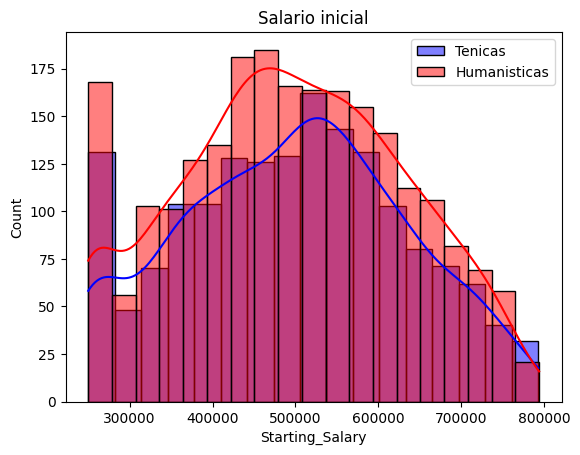

In [20]:
#Se profundiza el analisis en cuanto al salario inicial, desglozandolo por el tipo de carreras, es decir, carreras mas "Tecnicas" y carreras mas "Humanisiticas"

Tecnicas = Educacion_df[Educacion_df['Field_of_Study'].isin(['Computer Science', 'Mathematics', 'Engineering'])]['Starting_Salary']
Humanisticas = Educacion_df[Educacion_df['Field_of_Study'].isin(['Arts', 'Law', 'Medicine', 'Business'])]['Starting_Salary']
sns.histplot(Tecnicas, color='blue', label='Tenicas', kde=True)
sns.histplot(Humanisticas, color='red', label='Humanisticas', kde=True)
plt.legend()
plt.title('Salario inicial')
plt.show()

Para comprobar si realmente existe una diferencia entre los salarios de estudiantes de carreras humanisticas vs tenicas, se utiliza el metodo del p-value en el cual se plantea la siguiente hipotesis nula (H₀):

-Hipótesis nula (H₀): No hay diferencia significativa en los salarios entre ambas carreras.
-Hipótesis alternativa (H₁): Sí hay una diferencia significativa en los salarios



In [21]:
p_value_mannwhitney = stats.mannwhitneyu(Tecnicas, Humanisticas)
print(p_value_mannwhitney)

MannwhitneyuResult(statistic=np.float64(1922985.5), pvalue=np.float64(0.6681058778906215))


A pesar de que visualmente parece que existe una diferencia entre los salarios de los graduados de carreras tecnicas vs humanisticas, se obtuvo un valor p = 0,67. Por lo tanto, no hay motivos para rechazar H0, lo que significa que los salarios iniciales promedio entre los estudiantes de humanidades y técnicos son iguales.

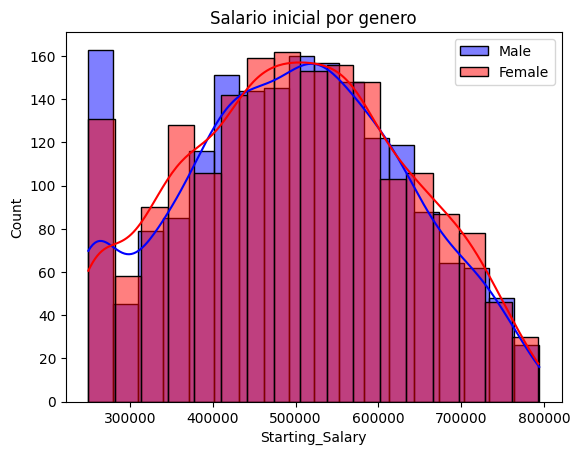

In [22]:
#Se realiza el mismo analisis pero ahora por genero

Educacion_df = Educacion_df[Educacion_df['Gender'].isin(['Male', 'Female'])]

Salario_hombre = Educacion_df[Educacion_df['Gender'] == 'Male']['Starting_Salary']
Salario_mujer = Educacion_df[Educacion_df['Gender'] == 'Female']['Starting_Salary']

sns.histplot(Salario_hombre, color='blue', label='Male', kde=True)
sns.histplot(Salario_mujer, color='red', label='Female', kde=True)
plt.legend()
plt.title('Salario inicial por genero')
plt.show()

Se plantea nuevamente el metodo p-value utilizando la siguiente hipotesis nula (H₀) para ver si existe diferencia entre los salarios iniciales entre hombres y muejres:

-Hipótesis nula (H₀): No hay diferencia significativa en los salarios entre hombres y mujeres.
-Hipótesis alternativa (H₁): Sí hay una diferencia significativa en los salarios

In [23]:
p_value_mannwhitney = stats.mannwhitneyu(Salario_hombre, Salario_mujer)
print(p_value_mannwhitney)

MannwhitneyuResult(statistic=np.float64(1787514.5), pvalue=np.float64(0.5151709886493604))


Siendo que el valor de p es de 0.51, no podemos decir que los salarios son distintos en conclusion los salarios son iguales.

## **Conclusiones finales**

Luego del analisis realizados, se vuelve sobre las hipotesis que nos planteamos en un inicio:

* **Los estudiantes de universidades mejor rankeadas reciben mayores salarios iniciales** --> Esto no es del todo cierto, si bien existe una relacion entre estas 2 variable y los estudiantes de de universidades mas prestigiosas tienden a obtener mejores salarios, no es una relacion lineal ya que existe una gran variabilidad.

* **Los estudiantes con más pasantías y certificaciones tienen más ofertas de trabajo** --> Esto es cierto, se pudo ver que existe una buena relacion entre la cantidad de ofertas de trabajo y la cantidad de pasantias realizadas y que a mayor cantidad de pasantias realizadas, mayor es la oferta de trabajo, es decir, se valora la experiencia, no asi con las certificaciones completadas.

* **Los graduados de carreras técnicas (por ejemplo, Ciencias de la Computación) tienen un salario inicial más alto en comparación con los graduados de carreras humanas** --> Esto termino siendo falso, como vimos anteriormente mediante el metodo del p-value, no existe razon para creer que los graduados de carreras tecnicas tienen salarios iniciales mas altos en comparacion con los de carreras humanisticas, si bien visualmente pareciera que si, pudimos determinar estadisticamente que no se puede afirmar esta diferencia.

* **El salario inicial entre hombres y mujeres graduados es aproximadamente igual** --> Como pudimos ver, tambien mediante el metodo del p-value, es salario inicial entre hombres y mujeres es aproximadamente igual.

# Proyecto Final (Analisis complementario al anterior)

### **Seleccionar Features**

Para poder reducir la dimensionalidad de nuestro DataSet se procede a analizar la correlacion que existe entre las variables mediante una matrix de correlacion. Esta matriz es una herramienta valiosa para identificar qué características tienen la mayor influencia, lo que te permite seleccionar las más relevantes para incluir en el modelado predictivo. Luego se realiza un heatmap de las variables mas influyentes para el estudio que fueron descriptas en el analisis anterior.


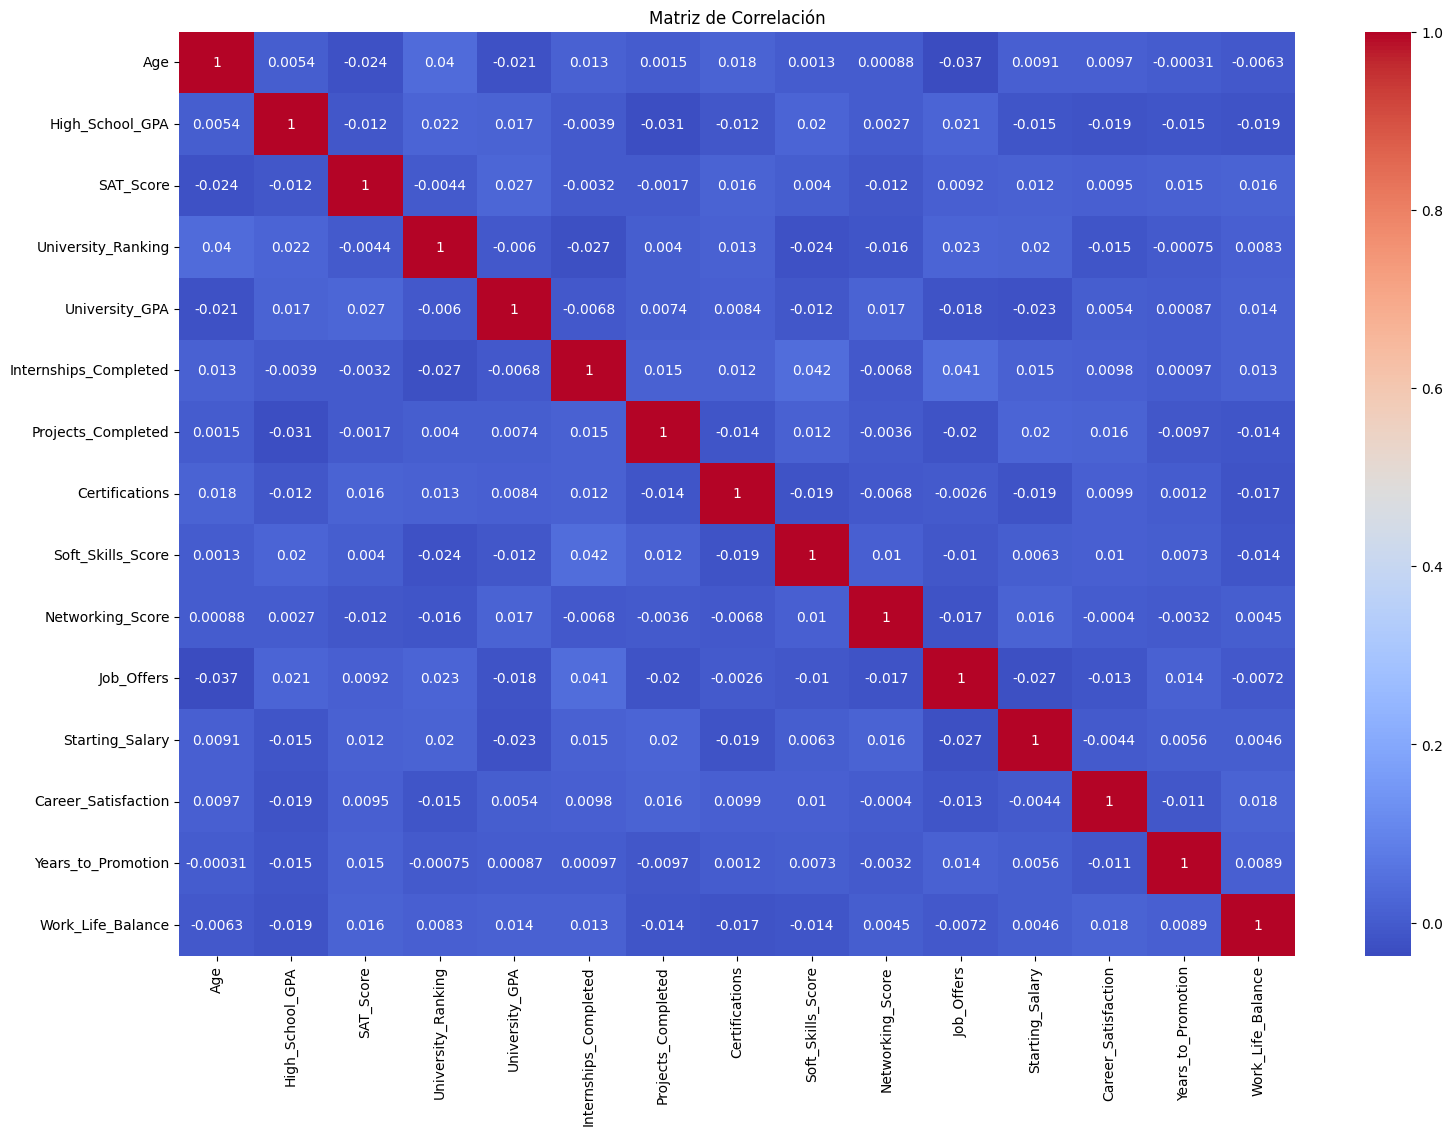

In [25]:
# Calcular la matriz de correlación
plt.figure(figsize=(18, 12))
correlation_matrix = Educacion_numerica_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

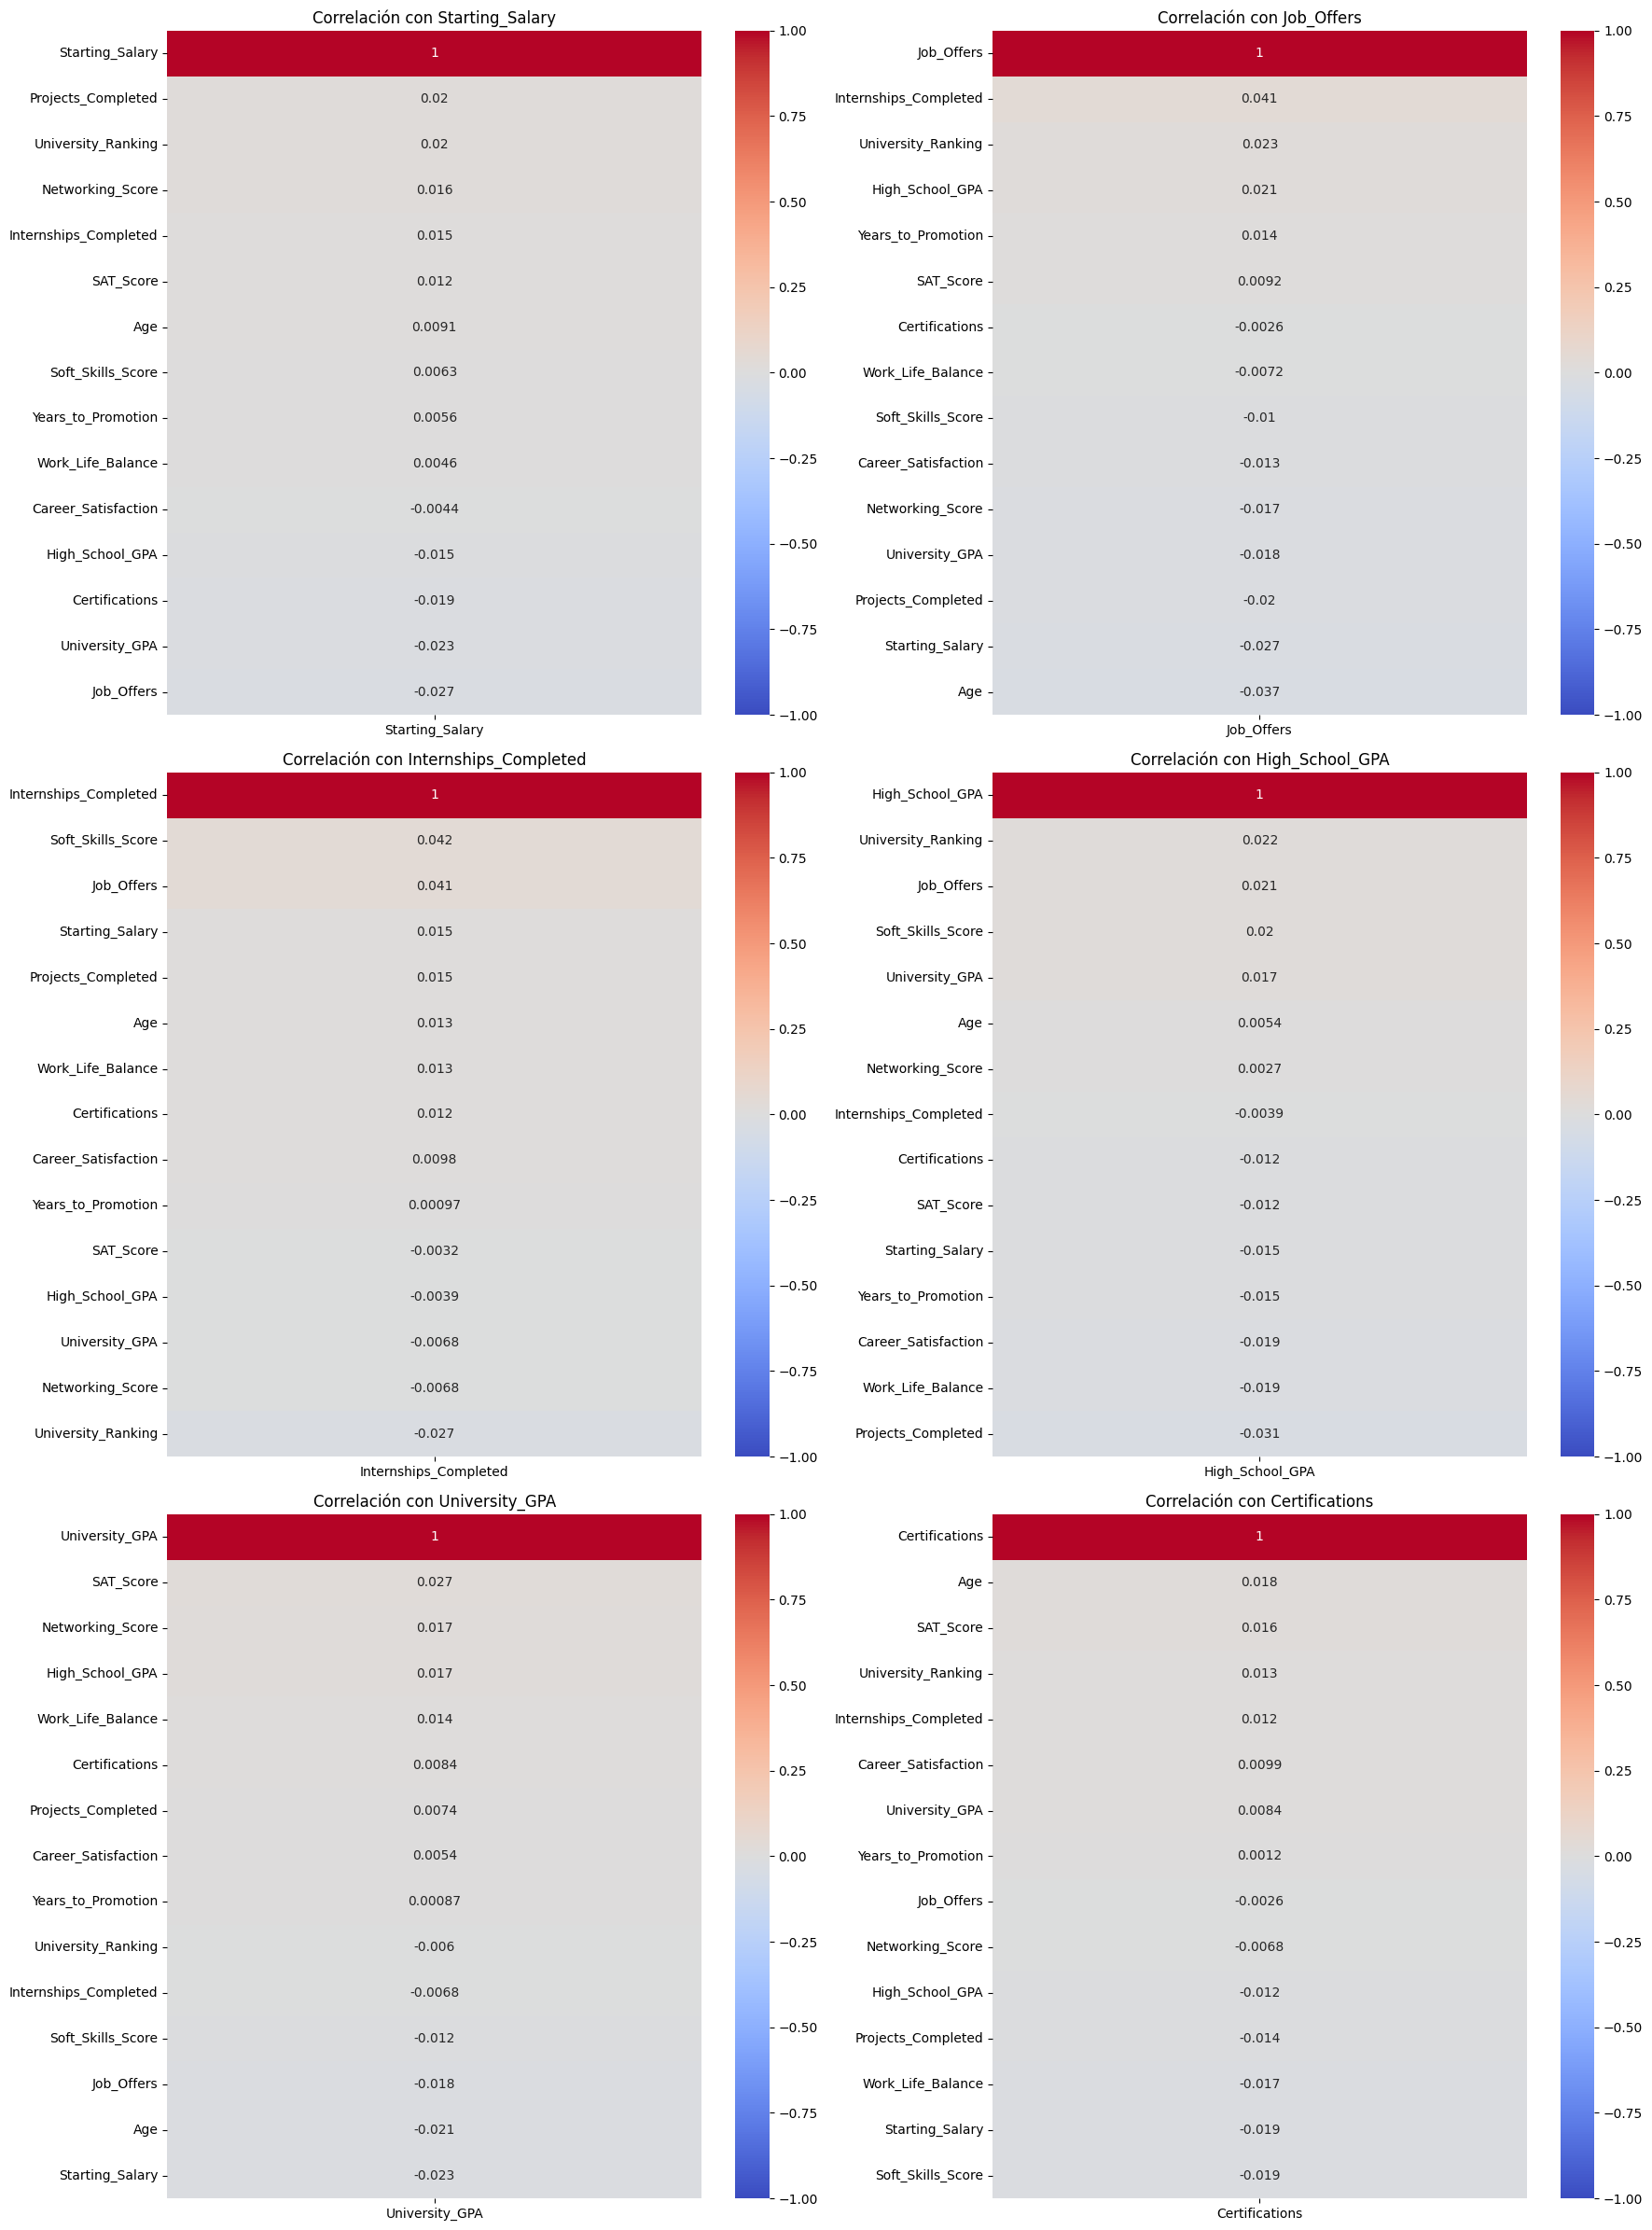

In [26]:
# Visualizar la correlación para las variables de interes
response_correlation1 = correlation_matrix['Starting_Salary'].sort_values(ascending=False)
response_correlation2 = correlation_matrix['Job_Offers'].sort_values(ascending=False)
response_correlation3 = correlation_matrix['Internships_Completed'].sort_values(ascending=False)
response_correlation4 = correlation_matrix['High_School_GPA'].sort_values(ascending=False)
response_correlation5 = correlation_matrix['University_GPA'].sort_values(ascending=False)
response_correlation6 = correlation_matrix['Certifications'].sort_values(ascending=False)


# Crear un heatmap para las correlaciones más significativas
fig, axes = plt.subplots(3, 2, figsize=(18, 24))
sns.heatmap(response_correlation1.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0,0])
axes[0,0].set_title('Correlación con Starting_Salary')
sns.heatmap(response_correlation2.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0,1])
axes[0,1].set_title('Correlación con Job_Offers')
sns.heatmap(response_correlation3.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1,0])
axes[1,0].set_title('Correlación con Internships_Completed')
sns.heatmap(response_correlation4.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1,1])
axes[1,1].set_title('Correlación con High_School_GPA')
sns.heatmap(response_correlation5.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[2,0])
axes[2,0].set_title('Correlación con University_GPA')
sns.heatmap(response_correlation6.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[2,1])
axes[2,1].set_title('Correlación con Certifications')
plt.tight_layout()
plt.show()

De los anteriores graficos podemos sacar las siguientes conclusiones sobre las correlaciones:

***Starting_Salary:***


  * **Pasantias completadas (Internships_Completed):**

    * **Correlación: 0.015**
    * Interpretación: Existe una relacion positiva entre la cantidad de pasantias realizadas por una persona y su salario inicial. Lo cual nos habla de la valoracion de la experiencia a la hora del primer sueldo

  * **GPA de secundario/GPA de universidad/Certificaciones/ofertas de trabajo (High_School_GPA/University_GPA/Certifications/Job_Offers):**

    * **Correlación: Alrededor de -0.015 a -0.027**
    * Interpretación: El mercado laboral podría valorar más la experiencia que las calificaciones académicas. Las certificaciones pueden no estar relacionadas con trabajos de alto salario inicial. Quizás las personas que reciben más ofertas de trabajo tienden a aceptar empleos con salarios más bajos inicialmente (posiblemente en busca de crecimiento futuro).



***Job_Offers:***


  * **Pasantias completadas (Internships_Completed):**

    * **Correlación: 0.041**
    * Interpretación: Existe una relacion positiva entre la cantidad de pasantias realizadas por una persona y la cantida de ofertas de trabajo que recibe. Lo cual nos habla de la valoracion de la experiencia a futuro


  * **GPA de la secundaria (High_School_GPA):**

    * **Correlación: 0.021**
    * Interpretación: Existe una relacion positiva entre los GPA del secundario con las ofertas de trabajo que obtengo. Lo cual me habla de que el buen desempeño en el secundario importa a futuro. Las personas con alto GPA en secundaria suelen elegir carreras con más demanda laboral, esto podría explicar por qué reciben más ofertas de trabajo


  * **Certificaciones/GPA de universidad/Salario Inicial (Certifications/University_GPA/Starting_Salary):**

    * **Correlación: Alrededor de -0.0026 a -0.027**
    * Interpretación: Esto significa que a medida que la cantidad de pasantias completadas aumenta estas 3 tienen a disminuir. Esto puede significa que un alto GPA universitario y muchas certificaciones pueden indicar que una persona se centró en lo académico más que en la experiencia práctica. Si ciertos sectores tienen alta demanda de trabajadores pero sueldos iniciales bajos, los candidatos en esas áreas recibirán muchas ofertas, pero con menor paga


***Internships_Completed:***


  * **Ofertas de trabajo (Job_Offers):**

    * **Correlación: 0.041**
    * Interpretación: Existe una relacion positiva entre la cantidad de pasantias realizadas por una persona y la cantida de ofertas de trabajo que recibe. Lo cual nos habla de la valoracion de la experiencia a futuro

  * **Salario Inicial (Starting_Salary):**

    * **Correlación: 0.015**
    * Interpretación: Existe una relacion positiva entre la cantidad de pasantias realizadas por una persona y su salario inicial. Lo cual nos habla de la valoracion de la experiencia a la hora del primer sueldo

  * **Certificaciones (Certifications):**

    * **Correlación: 0.012**
    * Interpretación: Las personas más proactivas buscan tanto experiencia laboral como educación adicional.Es probable que quienes hacen muchas pasantías también sean proactivos en mejorar su perfil profesional, obteniendo certificaciones para complementar su experiencia práctica.

  * **GPA de secundario/GPA de universidad(High_School_GPA/University_GPA):**

    * **Correlación: Alrededor de -0.0039 a -0.0068**
    * Interpretación: Las personas que priorizan la experiencia laboral pueden dedicar menos tiempo al estudio. Si alguien invierte mucho tiempo en pasantías, es posible que dedique menos horas al estudio, lo que podría afectar su rendimiento académico


***High_School_GPA:***


  * **Ofertas de trabajo (Job_Offers):**

    * **Correlación: 0.021**
    * Interpretación: Existe una relacion positiva entre los GPA del secundario con las ofertas de trabajo que obtengo. Lo cual me habla de que el buen desempeño en el secundario importa a futuro.

  * **GPA de la universidad (University_GPA):**

    * **Correlación: 0.017**
    * Interpretación: Existe una relacion positiva entre los GPA del secundario con el GPA de la universidad. Esto nos dice que los alumnos que eran "aplicados" en el secundario tienden a ser buenos alumnos en la universidad.

  * **Certificaciones/Salario Inicial/Pasantias completadas (Certifications/University_GPA/Starting_Salary/Internships_Completed):**

    * **Correlación: Alrededor de -0.0039 a -0.015**
    * Interpretación: Las personas con mejor GPA en secundaria pueden haber optado por carreras que valoran la educación formal, pero no tienen los salarios iniciales más altos (por ejemplo, humanidades o ciencias sociales).Un alto rendimiento académico en secundaria puede estar relacionado con un enfoque más teórico en la educación universitaria, en lugar de en certificaciones o experiencia laboral temprana.

***University_GPA:***


  * **GPA del secundario (High_School_GPA):**

    * **Correlación: 0.017**
    * Interpretación: Existe una relacion positiva entre los GPA del secundario con el GPA de la universidad. Esto nos dice que los alumnos que eran "aplicados" en el secundario tienden a ser buenos alumnos en la universidad.

  * **Certificaciones (Certifications):**

    * **Correlación: 0.0084**
    * Interpretación: Las personas con un alto GPA en la universidad suelen ser estudiantes disciplinados y motivados, lo que también podría reflejarse en su interés por obtener certificaciones adicionales.

  * **Ofertas de trabajo/Salario Inicial/Pasantias completad(Job_Offers/Starting_Salary/Internships_Completed):**

    * **Correlación: Alrededor de -0.068 a -0.023**
    * Interpretación: Un GPA alto puede indicar que te enfocaste en lo académico más que en obtener experiencia laboral a través de pasantías. Algunos de los trabajos mejor pagados pueden valorar más la experiencia práctica y habilidades técnicas que un expediente académico perfecto.

***Certifications:***

  * **Pasantias completadas (Internships_Completed):**

    * **Correlación: 0.012**
    * Interpretación: Las personas más proactivas buscan tanto experiencia laboral como educación adicional.Es probable que quienes hacen muchas pasantías también sean proactivos en mejorar su perfil profesional, obteniendo certificaciones para complementar su experiencia práctica.

  * **GPA de universidad (GPA_University):**

    * **Correlación: 0.0084**
    * Interpretación: Las personas con un alto GPA en la universidad suelen ser estudiantes disciplinados y motivados, lo que también podría reflejarse en su interés por obtener certificaciones adicionales.
    
  * **Salario Inicial/GPA de secundario/Ofertas de trabajo(Starting_Salary/High_School_GPA/Job_Offers):**
          
    * **Correlación: Alrededor de -0.0026 a -0.019**
    * Interpretación: Si las personas con más certificaciones recibieron menos ofertas de trabajo y salarios más bajos, esto sugiere que las certificaciones por sí solas no fueron suficientes para mejorar la empleabilidad.Las certificaciones pueden haber sido una forma de compensar un historial académico no tan fuerte, intentando mejorar su perfil profesional con credenciales adicionales.

### **Seleccion del algoritmo adecuado**


Dado que no tenemos una variable categoriga, se utilizara modelos de regresion lineal para analizar las diferentes relaciones entre las variables de interes vistas, evaluando la performance de cada modelo.

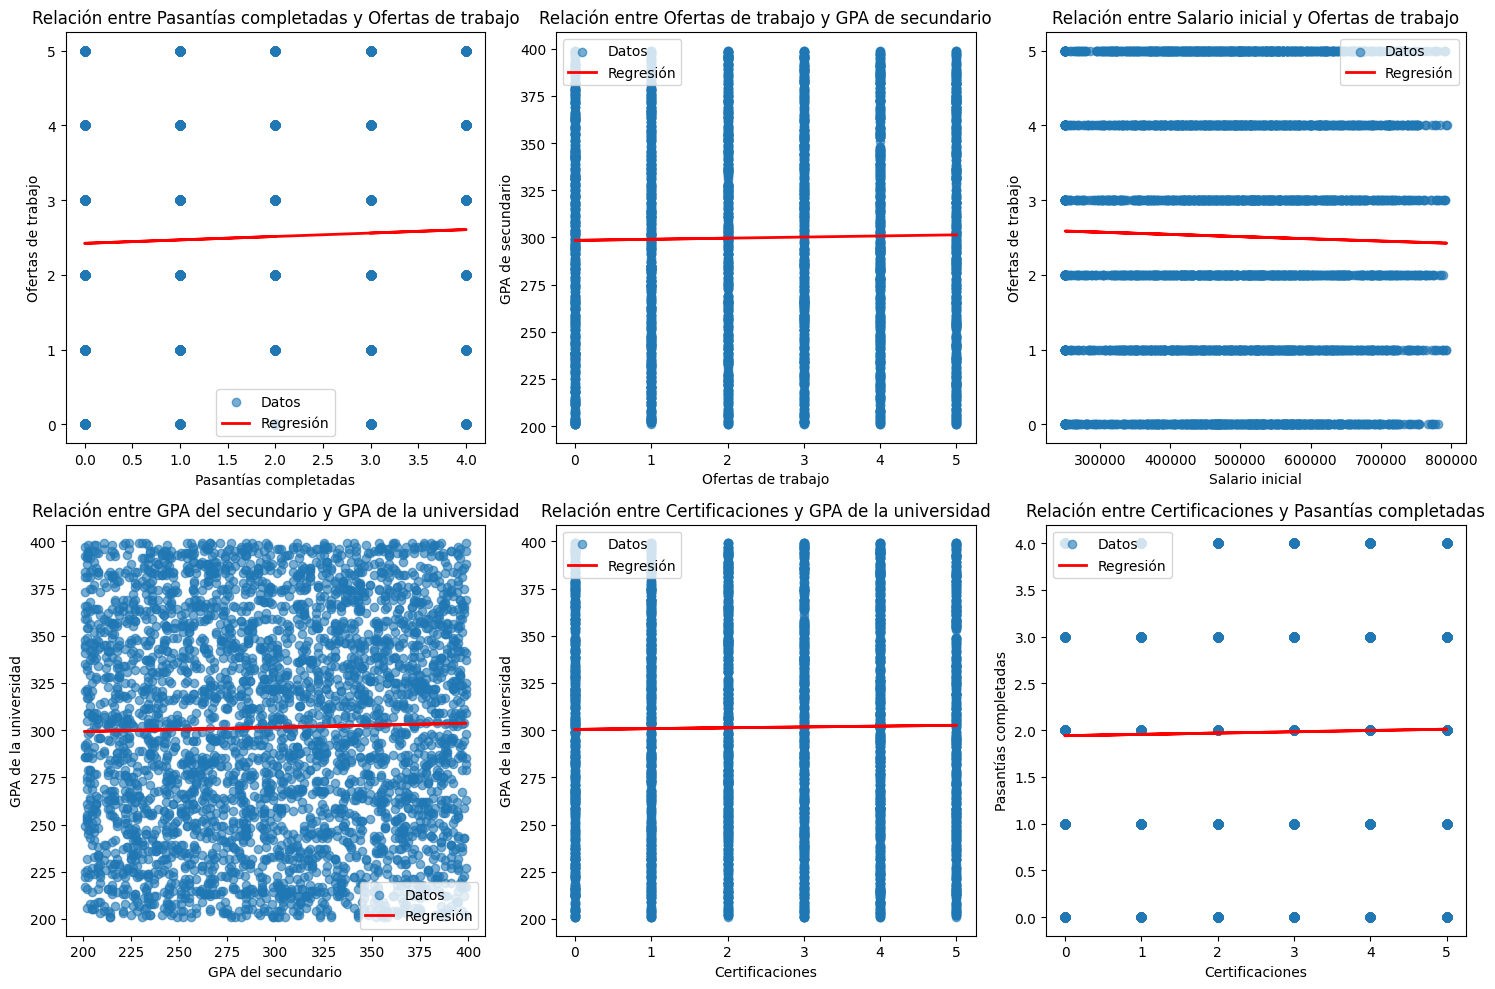

In [27]:
#Creo la lista de pares que voy a usar para los modelos de regresion
pares_regresion = [
    ("Internships_Completed", "Job_Offers", "Pasantías completadas", "Ofertas de trabajo"),
    ("Job_Offers", "High_School_GPA", "Ofertas de trabajo", "GPA de secundario"),
    ("Starting_Salary", "Job_Offers", "Salario inicial", "Ofertas de trabajo"),
    ("High_School_GPA", "University_GPA", "GPA del secundario", "GPA de la universidad"),
    ("Certifications", "University_GPA", "Certificaciones", "GPA de la universidad"),
    ("Certifications", "Internships_Completed", "Certificaciones", "Pasantías completadas")]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

#Creo una lista vacia para almacenar los valores de valuacion de cada modelo
accuracy_results = []

#Itero sobre cada modelo y grafico
for i, (x_var, y_var, x_label, y_label) in enumerate(pares_regresion):
    X = Educacion_df[x_var].values.reshape(-1, 1)
    y = Educacion_df[y_var]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    accuracy_results.append((x_label, y_label, mse, rmse))

    axes[i].scatter(X, y, alpha=0.6, label="Datos")
    axes[i].plot(X, y_pred, color='red', linewidth=2, label="Regresión")

    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].set_title(f"Relación entre {x_label} y {y_label}")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [28]:
#Calculo el RMSE para evaluar nuestros modelos

print(f"{'Variable X':<25} {'Variable Y':<25} {'RMSE':<10}")
print("------------------------------------------------------")
for x_label, y_label, mse, rmse in accuracy_results:
    print(f"{x_label:<25} {y_label:<25} {rmse:<10.2f}")

Variable X                Variable Y                RMSE      
------------------------------------------------------
Pasantías completadas     Ofertas de trabajo        1.71      
Ofertas de trabajo        GPA de secundario         57.33     
Salario inicial           Ofertas de trabajo        1.71      
GPA del secundario        GPA de la universidad     57.50     
Certificaciones           GPA de la universidad     57.51     
Certificaciones           Pasantías completadas     1.41      


Para comprender si estos valores de RMSE son bajos o no hay que tener en cuenta los valores de la variable "y" a la que hacen referencia. Por ejemplo: Para las ofertas de trabajo, tenemos valores entre 0 y 5, por lo que un valor de 1.71 representa un valor bajo. Mismo es el caso de "Pasantias completadas", "GPA de la universidad" y "GPA de secundario" en donde sus valores oscilan rangos mucho mayores a los numeros obtenidos. Por lo que un RMSE bajo significa que el error es pequeño y las predicciones están cerca de los valores reales.


### **Conclusiones finales**

**Factores Significativos:**

* Pasantias completadas (Internships_Completed) y las ofertas de trabajo (Job_Offers): Los empleadores valoran candidatos con experiencia laboral previa. A su vez las pasantías te permiten conocer profesionales que pueden recomendarte. Empresas donde realizaste una pasantia podrian ofrecerte un trabajo directamente. Se adquieren habilidades prácticas durante las pasantias que te hacen más atractivo para los reclutadores.

* Pasantias completadas (Internships_Completed) y las certificaciones (Certifications): Las personas más proactivas buscan tanto experiencia laboral como educación adicional.Es probable que quienes hacen muchas pasantías también sean proactivos en mejorar su perfil profesional, obteniendo certificaciones para complementar su experiencia práctica

* Salario inicial (Starting_Salary) y las pasantias completadas (Internships_Completed): Las empresas suelen pagar más a quienes ya tienen experiencia real en el campo. Haber hecho pasantías en empresas reconocidas te hace más atractivo para empleadores con mejores sueldos



**Factores Negativos:**

* GPA de universidad (GPA_University) ,las ofertas de trabajo (Job_Offers) y las pasantias completadas (Internships_Completed): Un GPA alto puede indicar que te enfocaste en lo académico más que en obtener experiencia laboral, eso puede terminar siendo contraproducente a la hora de recibir ofertas de trabajo de reclutadores que valoren mas la experiencia laboral antes que un expediente academico perfecto

* Salario inicial (Starting_Salary) ,las ofertas de trabajo (Job_Offers), las certificaciones(Certifications), el GPA de universidad (University_GPA) y el GPA del secundario (High_School_GPA) : Esta correlacion negativa entre estas variables inidica que el mercado laboral podría valorar más la experiencia que las calificaciones académicas. Las certificaciones pueden no estar relacionadas con trabajos de alto salario inicial o quizás las personas que reciben más ofertas de trabajo tienden a aceptar empleos con salarios más bajos inicialmente (posiblemente en busca de crecimiento futuro).

**Metodología:**

* Se utilizó un análisis de correlación para identificar y seleccionar características significativas.


* Se implementó  modelos de regresión lineal para predecir valores, eligiendo variables basadas en su significancia estadística y relevancia práctica.

**Resultados del Modelo:**

* Los modelos de regresion lineal utilizados fueron validados mediante el calculo de la raiz del error cuadratico medio (RMSE), dando valor bajos lo que implica que el error es pequeño y las predicciones estan cerca de los valores reales.


**Reflexiones finales:**

Este estudio demuestra la importancia de utilizar análisis de datos avanzados para entender mejor la relacion existente entre el exito profesional, el rendimiento academico y la experiencia laboral. Llegando a conclusiones del tipo:


* **Un expediente academico perfecto (grandes GPA) no siempre garantizan un exito a nivel profesional** --> Se pudo ver el solo hecho de tener un gran valor de GPA, ya sea de universidad o secundario, no garantiza el exito en el ambiente profesional. Si esto no se complementa con experiencia laboral previa, es mas probable que personas que no hayan realizado ninguna queden en desventaja frente a aquellos que si lo posean.

* **Los estudiantes con más pasantías y certificaciones tienen más ofertas de trabajo** --> Se pudo ver que existe una buena relacion entre la cantidad de ofertas de trabajo y la cantidad de pasantias realizadas y que a mayor cantidad de pasantias realizadas/certificaciones, mayor es la oferta de trabajo, es decir, se valora la experiencia.

* **Los graduados de carreras técnicas (por ejemplo, Ciencias de la Computación) tienen un salario inicial más alto en comparación con los graduados de carreras humanas** --> Esto termino siendo falso, como vimos anteriormente mediante el metodo del p-value, no existe razon para creer que los graduados de carreras tecnicas tienen salarios iniciales mas altos en comparacion con los de carreras humanisticas, si bien visualmente pareciera que si, pudimos determinar estadisticamente que no se puede afirmar esta diferencia.

* **El salario inicial entre hombres y mujeres graduados es aproximadamente igual** --> Como pudimos ver, tambien mediante el metodo del p-value, es salario inicial entre hombres y mujeres es aproximadamente igual.
